In [52]:
import pandas as pd
import math

In [53]:
# Load the main compound data
df = pd.read_csv('compounds_data/cleansed_compounds.csv', keep_default_na=False)
df.head()

,compound,modifier,head
0,Aalbestand,Aal,Bestand
1,Aalfang,Aal,Fang
2,Aalfisch,Aal,Fisch
3,Aalmutter,Aal,Mutter
4,Aalquappe,Aal,Quappe


In [54]:
df_de_web = pd.read_csv('frequency_data/deu-de_web_2021_1M-words.txt', sep="\t", header=None, names=['word', 'freq'])
df_de_web

,word,freq
101,und,506683
102,der,443830
103,die,422247
104,in,243094
105,für,161903
...,...,...
694898,﻿Aus,1
694899,﻿Beim,1
694900,﻿Digitalisierung,1
694901,﻿Überdosierung,1


In [55]:
# Calculate the frequency class for each word: ⌊log2(max_f/f(grundform))+0,5⌋
max_f = df_de_web['freq'].max()
df_de_web['freq_class'] = df_de_web['freq'].apply(lambda x: int(math.floor(math.log2(max_f/x)+0.5)))
df_de_web

,word,freq,freq_class
101,und,506683,0
102,der,443830,0
103,die,422247,0
104,in,243094,1
105,für,161903,2
...,...,...,...
694898,﻿Aus,1,19
694899,﻿Beim,1,19
694900,﻿Digitalisierung,1,19
694901,﻿Überdosierung,1,19


In [56]:
# Merge the frequency class into the main compound data
df_merged = df.merge(df_de_web, how='left', left_on='compound', right_on='word')
df_merged = df_merged.drop(columns=['word', 'freq'])
df_merged

,compound,modifier,head,freq_class
0,Aalbestand,Aal,Bestand,NaN
1,Aalfang,Aal,Fang,NaN
2,Aalfisch,Aal,Fisch,NaN
3,Aalmutter,Aal,Mutter,NaN
4,Aalquappe,Aal,Quappe,NaN
...,...,...,...,...
118185,Zypressenöl,Zypresse,Öl,NaN
118186,Zypressenwolfsmilch,Zypresse,Wolfsmilch,NaN
118187,Zytologieassistent,Zytologie,Assistent,NaN
118188,Zytoplasma,zyto,Plasma,19.0


In [57]:
# Show statistics on the frequency class
print(df_merged['freq_class'].value_counts(dropna=False).sort_index())


6.0         1
7.0         1
8.0        18
9.0        37
10.0      100
11.0      245
12.0      656
13.0     1335
14.0     2504
15.0     4500
16.0     6398
17.0    11034
18.0     8743
19.0    18573
NaN     64045
Name: freq_class, dtype: int64


In [58]:
# Add the frequency data from the derewo dataset
df_derewo = pd.read_csv('frequency_data/derewo-v-ww-bll-250000g-2011-12-31-0.1/data_without_header.txt', sep=" ", header=None, names=['word', 'freq_derewo'], index_col=False)
df_merged = df_merged.merge(df_derewo, how='left', left_on='compound', right_on='word')
df_merged = df_merged.drop(columns=['word'], axis=1)

C:\Users\Martin\AppData\Local\Temp\ipykernel_9888\3580354791.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_derewo = pd.read_csv('frequency_data/derewo-v-ww-bll-250000g-2011-12-31-0.1/data_without_header.txt', sep=" ", header=None, names=['word', 'freq_derewo'], index_col=False)


In [59]:
# For each of the frequencies, show 5 random compounds with that frequency
freqs = df_merged['freq_class'].unique()
freqs.sort()
for freq in freqs:
    print(f"Frequency:{freq}, Count:{df_merged[df_merged['freq_class'] == freq].shape[0]}")
    count = df_merged[df_merged['freq_class'] == freq].shape[0]
    sample_size = min(count, 8)
    print(df_merged[df_merged['freq_class'] == freq].sample(n=sample_size, random_state=1))
    print('----------------')

Frequency:6.0, Count:1
         compound modifier    head  freq_class  freq_derewo
43619  Hochschule     hoch  Schule         6.0         11.0
----------------
Frequency:7.0, Count:1
        compound modifier  head  freq_class  freq_derewo
38818  Grundlage    grund  Lage         7.0         11.0
----------------
Frequency:8.0, Count:18
           compound modifier    head  freq_class  freq_derewo
30957     Freistaat     frei   Staat         8.0         13.0
3315         Anzahl       an    Zahl         8.0         12.0
104560       Umwelt       um    Welt         8.0         11.0
3129         Anteil       an    Teil         8.0         10.0
111674     Webseite      Web   Seite         8.0         14.0
57721     Landkreis     Land   Kreis         8.0         11.0
113352   Wettbewerb    Wette  Bewerb         8.0         10.0
3562    Arbeitgeber   Arbeit   Geber         8.0         11.0
----------------
Frequency:9.0, Count:39
                 compound modifier         head  freq_class  fr

# Revisited
The currenlty used frequency dataset, has a huge emphasis on eg politics, sports, news, etc. (as the data is probably from news articles).

"enthalten belletristische, wissenschaftliche und populärwissenschaftliche Texte, eine große Zahl von Zeitungstexten sowie eine breite Palette weiterer Textarten und werden kontinuierlich weiterentwickelt."
https://www.ids-mannheim.de/digspra/kl/projekte/korpora/

The current difficulty thresholds are 
- Easy: <= 13
- Medium <= 16
- Hard <= 20

6.0          1
7.0          2
8.0         20
9.0         59
10.0       160
11.0       405
12.0      1062
13.0      2397
14.0      4902
15.0      9408
16.0     15811
17.0     26849
18.0     35595
19.0     54169
NaN     118214
Name: freq_de_web, dtype: int64
8.0          3
9.0          8
10.0        38
11.0       104
12.0       294
13.0       765
14.0      1887
15.0      4297
16.0      8956
17.0     16907
18.0     28776
19.0     44552
20.0     62506
21.0     78417
22.0     87910
23.0     91562
24.0     92311
25.0     92341
26.0     92349
27.0     92350
NaN     118214
Name: freq_derewo, dtype: int64


<AxesSubplot: >

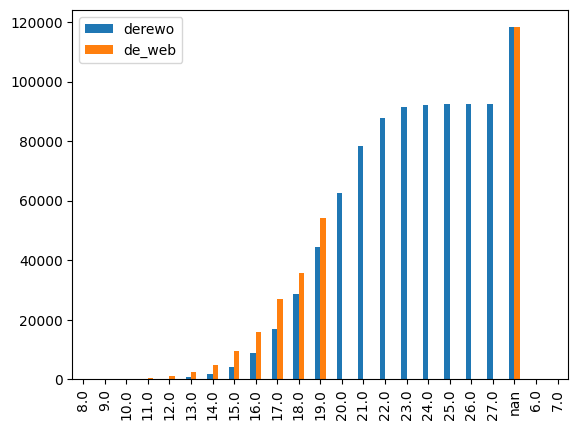

In [60]:
import matplotlib.pyplot as plt

# Rename the freq_class column to freq_de_web
df_merged = df_merged.rename(columns={'freq_class': 'freq_de_web'})

# Compare the two frequency datasets in a single bar chart
freq_count_de_web = df_merged['freq_de_web'].value_counts(dropna=False).sort_index().cumsum()
freq_count_derewo = df_merged['freq_derewo'].value_counts(dropna=False).sort_index().cumsum()

print(freq_count_de_web)
print(freq_count_derewo)

freq_merged = pd.concat([freq_count_derewo, freq_count_de_web], axis=1)
freq_merged.columns = ['derewo', 'de_web']
freq_merged.plot(kind='bar')


Potential new frequency_class bounds for freq_web_de
- Einfach: 11 - 12
- Mittel: 15
- Schwer: 18 - 19

In [61]:
# For de_web, show samples for each difficulty
steps = [12, 15, 18]
for step in steps:
    mask = df_merged['freq_de_web'] <= step
    print(f"Frequency:{step}, Count:{df_merged[mask].shape[0]}")
    count = df_merged[mask].shape[0]
    sample_size = min(count, 8)
    print(df_merged[mask].sample(n=sample_size, random_state=1))
    print('----------------')

Frequency:12, Count:1062
             compound  modifier     head  freq_de_web  freq_derewo
20359        Einblick       ein    Blick          9.0         12.0
69641        Netzwerk      Netz     Werk          8.0         12.0
83352       Rücksicht      rück    Sicht         12.0         12.0
87725  Schülerzeitung   Schüler  Zeitung         12.0         16.0
64810    Mieterverein    Mieter   Verein         11.0         16.0
38818       Grundlage     grund     Lage          7.0         11.0
56434       Kunstwerk     Kunst     Werk         12.0         12.0
85130    Schaltfläche  schalten   Fläche         11.0         20.0
----------------
Frequency:15, Count:9408
                  compound  modifier         head  freq_de_web  freq_derewo
17120      Datenmissbrauch     Daten   Missbrauch         15.0         18.0
3181    Antragsbearbeitung    Antrag  Bearbeitung         15.0         21.0
95938           Steinkohle     Stein        Kohle         15.0         16.0
102655       Trainingsplan

In [62]:
# Create the same samples for derewo
steps = [13, 16, 20]
for step in steps:
    mask = df_merged['freq_derewo'] <= step
    print(f"Frequency:{step}, Count:{df_merged[mask].shape[0]}")
    count = df_merged[mask].shape[0]
    sample_size = min(count, 8)
    print(df_merged[mask].sample(n=sample_size, random_state=1))
    print('----------------')

Frequency:13, Count:765
                   compound    modifier      head  freq_de_web  freq_derewo
71098              Oberliga       obere      Liga         16.0         12.0
24928             Fachkraft        Fach     Kraft         11.0         13.0
114350  Wirtschaftsminister  Wirtschaft  Minister         13.0         12.0
83375             Rücktritt        rück     Tritt         13.0         11.0
64004        Mehrwertsteuer    Mehrwert    Steuer         13.0         13.0
112557            Weltkrieg        Welt     Krieg         11.0         11.0
43811              Hochzeit        hoch      Zeit         12.0         12.0
15060          Bundesbürger        Bund    Bürger         14.0         13.0
----------------
Frequency:16, Count:8956
                     compound     modifier             head  freq_de_web  \
100041     Technologiekonzern  Technologie          Konzern         19.0   
42249               Heimspiel         Heim            Spiel         13.0   
97579             Stre

<AxesSubplot: >

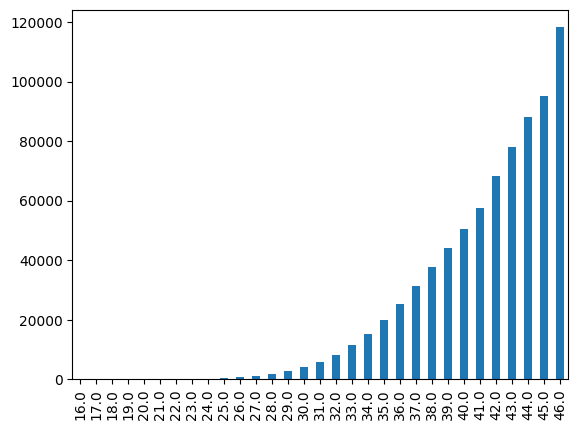

In [65]:


df_merged['freq_de_web'] = df_merged['freq_de_web'].fillna(23)     # De_web has a maximum frequency class of 19 -> punish it harder if the compound is not in the dataset

# Cap the max derewo frequency class to 23. Frequencies above 23 are replaced with 23
df_merged['freq_derewo'] = df_merged['freq_derewo'].clip(upper=23)
df_merged['freq_derewo'] = df_merged['freq_derewo'].fillna(27)    # Derewo has a maximum frequency class of 23

# Create a new column with the sum of the two frequencies
df_merged['freq_sum'] = df_merged['freq_de_web'] + df_merged['freq_derewo']

# Create a bar chart with the sum of the two frequencies
freq_count_sum = df_merged['freq_sum'].value_counts(dropna=False).sort_index().cumsum()
freq_count_sum.plot(kind='bar')